In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data


In [146]:
df = pd.read_csv('../data/raw/train.csv')

## Explore the dataset

### Overview

In [147]:
print('Shape:', df.shape)
df.head()


Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [148]:
print('Info:',df.info())


<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB
Info: None


In [149]:
print('DTypes:\n',df.dtypes)
df.describe()

DTypes:
 PassengerId      int64
Survived         int64
Pclass           int64
Name               str
Sex                str
Age            float64
SibSp            int64
Parch            int64
Ticket             str
Fare           float64
Cabin              str
Embarked           str
dtype: object


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Missing values

In [150]:
# Get missing values
missing = df.isnull().sum()
# Filter out columns with no missing values
missing = missing[missing > 0]
# Sort missing values in descending order
missing = missing.sort_values(ascending=False)

print("Columns with missing values:\n", missing)

Columns with missing values:
 Cabin       687
Age         177
Embarked      2
dtype: int64


### Duplicates

In [151]:
duplicates = df.duplicated().sum()

print("Number of duplicate rows:\n", duplicates)

Number of duplicate rows:
 0


### Outliers

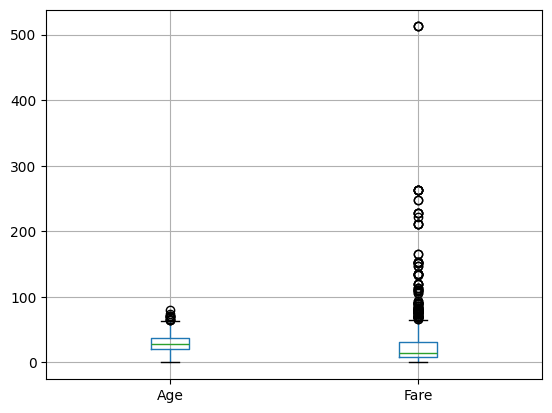

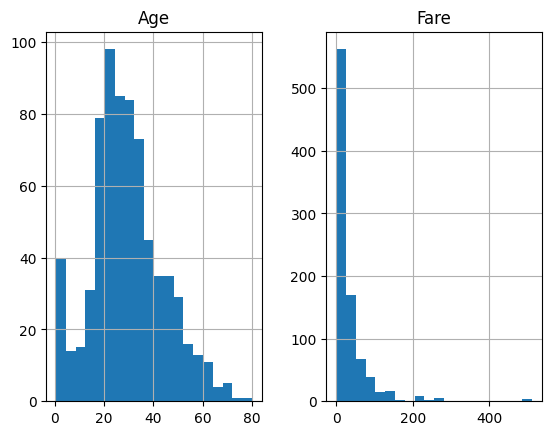

In [152]:
df[['Age', 'Fare']].boxplot()
df[['Age', 'Fare']].hist(bins=20)
plt.show()

In [153]:
# Calculate IQR for 'Fare' column
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [154]:
# Identify outliers in 'Fare' column
outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]
outliers[['Fare']].describe()

,Fare
count,116.000000
mean,128.291629
std,84.636908
min,66.600000
25%,78.189600
50%,90.000000
75%,147.778100
max,512.329200


#### Summary
**Data types**
- Numerical (continuous): Age, Fare
- Numerical (discrete): SibSp, Parch
- Categorical (encoded as int): Survived, Pclass
- Categorical (string): Name, Sex, Cabin, Embarked

**Missing values**
- Cabin: 687 (majority missing)
- Age: 177
- Embarked: 2

**Outliers**
- Age: no clear invalid values
- Fare: Heavily right-skewed, small number of very expensive tickets. No clear invalid values


## Visualise data

### Survival rate by categories

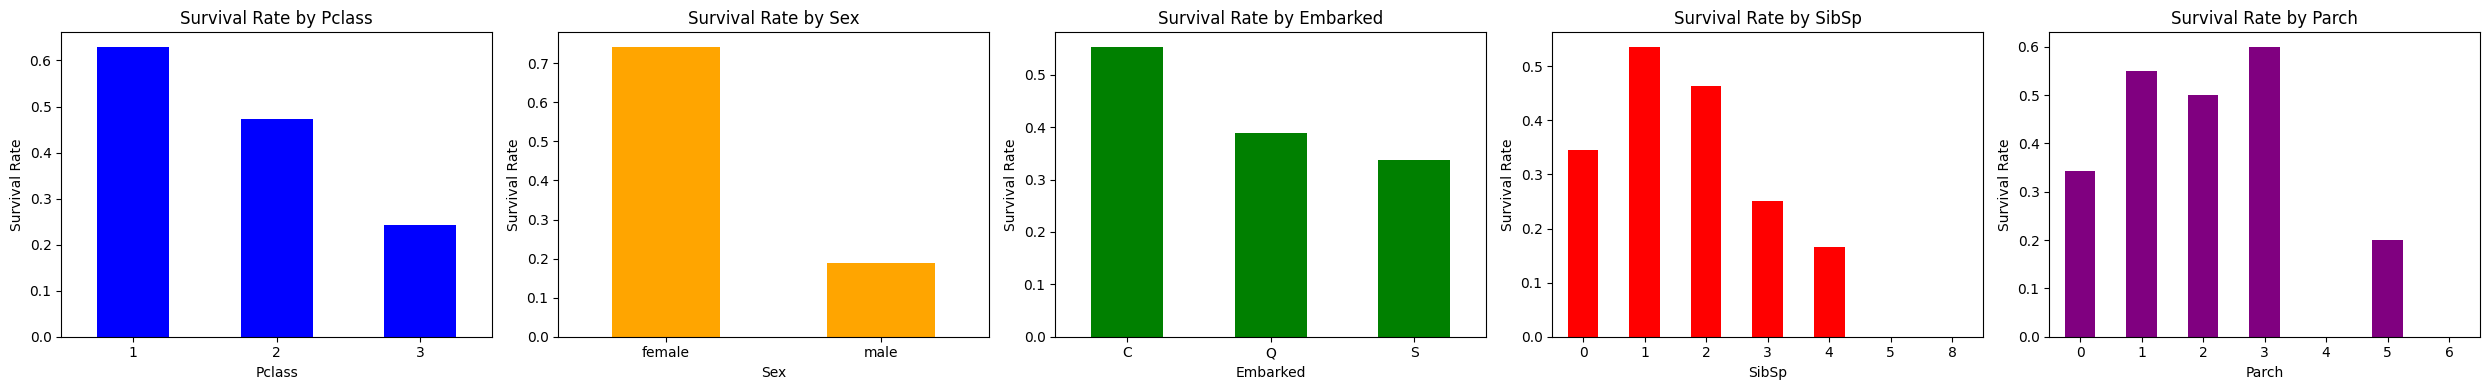

In [155]:
def plot_survival_rate_by_categories(df, categories, colors=None):
    n = len(categories)
    fig, axes = plt.subplots(1, n, figsize=(5 * n, 4))

    if n == 1:
        axes = [axes]
    
    for i, category in enumerate(categories):
        survival_rates = df.groupby(category)['Survived'].mean()
        color = colors[i] if colors else None
        survival_rates.plot(kind='bar', ax=axes[i], color=color)
        axes[i].set_title(f'Survival Rate by {category}')
        axes[i].set_ylabel('Survival Rate')
        axes[i].set_xlabel(category)
        axes[i].set_xticklabels(survival_rates.index, rotation=0)

    plt.tight_layout()
    plt.show()

plot_survival_rate_by_categories(
    df,
    ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch'],
    colors=['blue', 'orange', 'green', 'red', 'purple']
)


In [ ]:
def survival_summary_by_feature(df, categories):
    tables = []
    for category in categories:
        #  Count and mean of 'Survived'
        group = df.groupby(category)['Survived'].agg(['count', 'mean'])
        group = group.rename(columns={'count': 'Count', 'mean': 'Rate'})

        # Survival rate within the category
        group['SurvivalRate'] = (group['Rate'] * 100).round(1).astype(str) + '%'

        group['Feature'] = category
        tables.append(group.reset_index().rename(columns={category: 'Value'}))

    summary = pd.concat(tables, ignore_index=True)
    summary = summary[["Feature", "Value", "Count", "SurvivalRate"]]
    return summary

summary = survival_summary_by_feature(
    df,
    ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']
)

summary

,Feature,Value,Count,SurvivalRate
0,Pclass,1,216,63.0%
1,Pclass,2,184,47.3%
2,Pclass,3,491,24.2%
3,Sex,female,314,74.2%
4,Sex,male,577,18.9%
5,Embarked,C,168,55.4%
6,Embarked,Q,77,39.0%
7,Embarked,S,644,33.7%
8,SibSp,0,608,34.5%
9,SibSp,1,209,53.6%


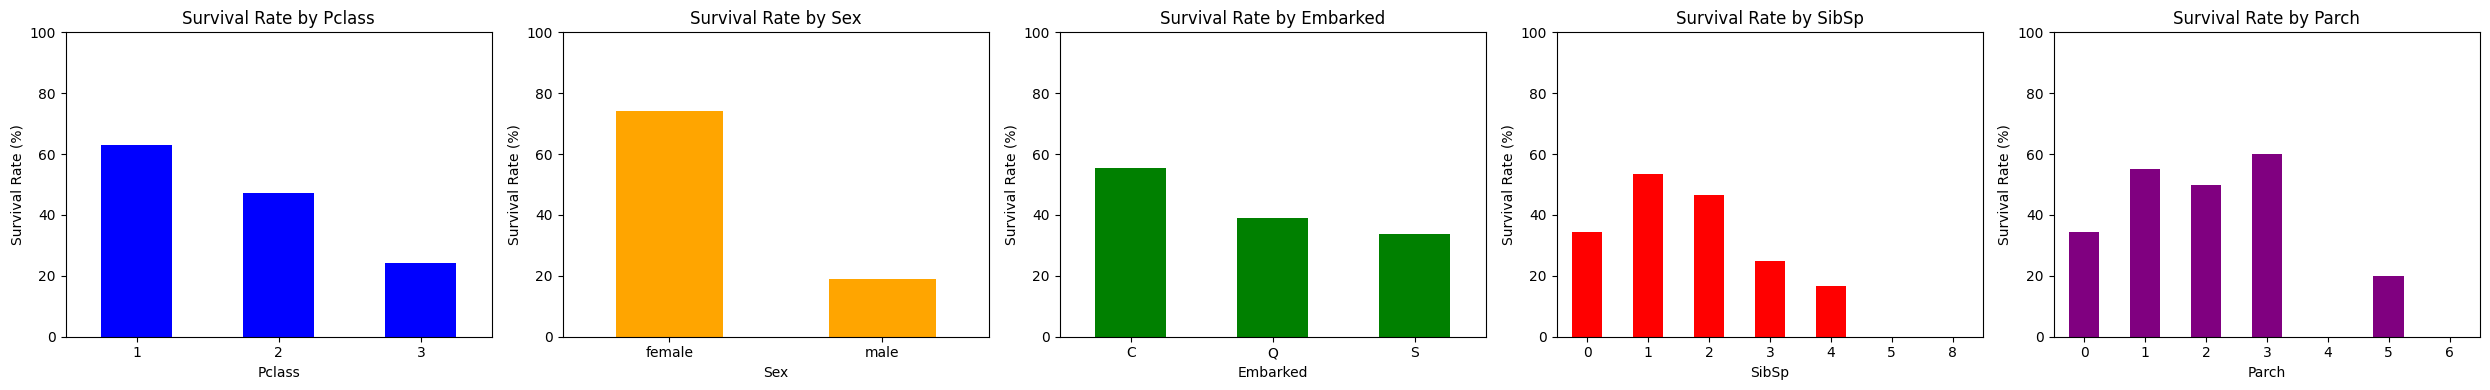

In [157]:
def plot_survival_rate_by_categories(df, categories, colors=None):
    n = len(categories)
    fig, axes = plt.subplots(1, n, figsize=(5 * n, 4))

    if n == 1:
        axes = [axes]

    for i, category in enumerate(categories):
        # Calculate survival rate in percent
        survival_rates = df.groupby(category)['Survived'].mean() * 100

        color = colors[i] if colors else None

        survival_rates.plot(
            kind='bar',
            ax=axes[i],
            color=color
        )

        axes[i].set_title(f'Survival Rate by {category}')
        axes[i].set_ylabel('Survival Rate (%)')
        axes[i].set_xlabel(category)
        axes[i].set_ylim(0, 100)
        axes[i].set_xticklabels(survival_rates.index, rotation=0)

    plt.tight_layout()
    plt.show()

plot_survival_rate_by_categories(
    df,
    ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch'],
    colors=['blue', 'orange', 'green', 'red', 'purple']
)

### Survival vs age and fare
Do survivors differ in age or fare compared to non-survivors?

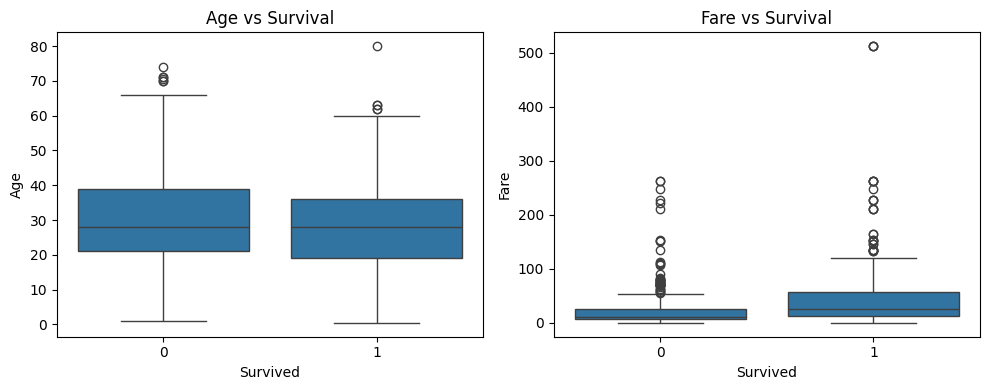

In [158]:
ig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(data=df, x="Survived", y="Age", ax=axes[0])
axes[0].set_title("Age vs Survival")

sns.boxplot(data=df, x="Survived", y="Fare", ax=axes[1])
axes[1].set_title("Fare vs Survival")

plt.tight_layout()
plt.show()

**Conclusion**
- Survivors are generally younger
- Survivors generally payed higher fares

### Correlation for numerical values

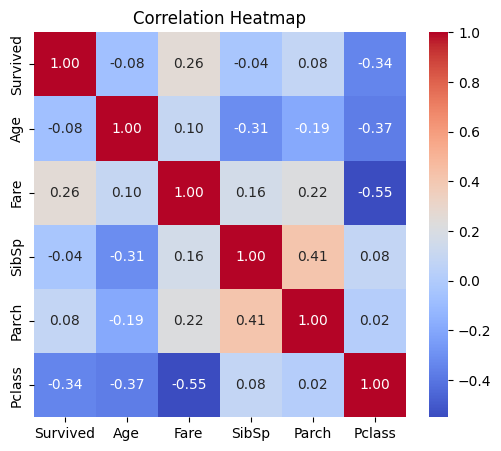

In [159]:
num_df = df[["Survived", "Age", "Fare", "SibSp", "Parch", "Pclass"]]
corr = num_df.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Conclusion**
- Highest correlation between Survived and Fare
- Lowest correlation between Survived and Pclass

### Survival class balance

In [160]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

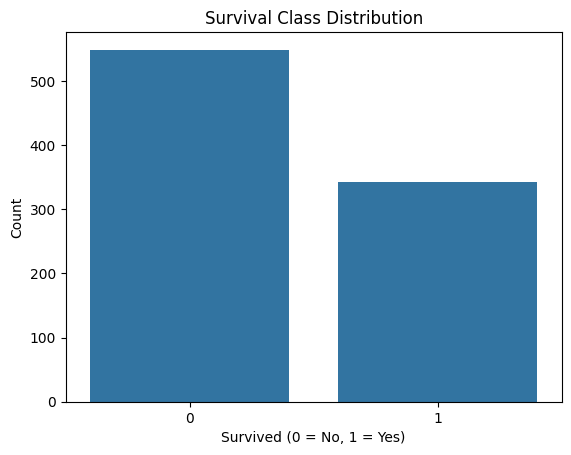

In [161]:
sns.countplot(data=df, x="Survived")
plt.title("Survival Class Distribution")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

#### Conclusion summary
**Survivors are more likely:**
 - Younger
 - Female
 - Higher passenger classes
 - Higher fares

## Load the cleaned data

In [179]:
cleaned_df = pd.read_csv('../data/processed/train_cleaned.csv')

## Encode categorical variables
Models can't learn from strings, we need to encode categorical values. Since we will most likely remove 'name', 'ticket_number', 'cabin' the remaining columns to encode are 'sex' and 'embarked_port'. 'sex' will be encoded to a binary numeric value (0/1) and 'embarked_port' will be one-hot encoded. If 'name' and 'cabin' are kept we can extract 'title' and 'deck' from those columns. 

#### Sex
Binary encode to numeric values (0/1)

In [186]:
print(f"sex before: {cleaned_df['sex'].unique().tolist()}")
cleaned_df["is_female"] = cleaned_df["sex"].map({"male": 0, "female": 1})
print(f"is_female after:  {cleaned_df['is_female'].unique().tolist()}")

sex before: ['male', 'female']
is_female after:  [0, 1]


In [198]:
# Verify that there are no missing values in the new 'is_female' column
missing_is_female = cleaned_df["is_female"].isna().sum()
value_counts_is_female = cleaned_df["is_female"].value_counts()
print(f"Missing values in 'is_female': {missing_is_female}")
print(f"Value counts in 'is_female': {value_counts_is_female}")

Missing values in 'is_female': 0
Value counts in 'is_female': is_female
0    577
1    314
Name: count, dtype: int64


In [ ]:
# drop the original 'sex' column
cleaned_df = cleaned_df.drop(columns=["sex"])

#### Embarked
One-hot encode, prefix with feature name, keep all categories, remove original column

In [ ]:
cleaned_df = pd.get_dummies(
    cleaned_df,
    columns=['embarked_port'],
    prefix='embarked_port',
    dtype=int,
)

cleaned_df.head()

,passenger_id,survived,passenger_class,name,age,sibling_spouse_count,parent_child_count,ticket_number,fare,cabin,is_female,embarked_port_C,embarked_port_Q,embarked_port_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,0,1


## Feature engineer

In [232]:

def survival_summary_by_feature(df, col):
    summary = (
        df.groupby(col)['survived']
        .agg(['count', 'mean'])
        .reset_index()
    )

    summary['survival_rate'] = (
        (summary['mean'] * 100)
        .round(1)
        .astype(int)
        .map(lambda x: f"{x}%")
    )

    return summary

### Bin `age_group`

In [203]:
# Find the cut-off age that best separates children from adults in terms of survival rate
scores = {}

for age in range(5, 21):
    is_child = (cleaned_df["age"] < age).astype(int)
    scores[age] = abs(cleaned_df.groupby(is_child)["survived"].mean().diff().iloc[-1])

best_age = max(scores, key=scores.get)
best_age, scores[best_age]

(7, np.float64(0.2792016806722689))

This suggests that very young children had a significantly higher survival rate. A cut-off at age 6 is not very meaningful

In [225]:
# Define age bins and laels
age_bins = [0, 13, 18, 30, 50, 100]
age_labels = ['child', 'teenager', 'young_adult', 'adult', 'senior']

In [237]:
cleaned_df["age_group"] = pd.cut(
    cleaned_df["age"],
    bins=age_bins,
    labels=age_labels
)

cleaned_df.groupby("age_group")["survived"].mean()
survival_summary_by_feature(cleaned_df, "age_group")

,age_group,count,mean,survival_rate
0,child,75,0.560000,56%
1,teenager,70,0.400000,40%
2,young_adult,400,0.325000,32%
3,adult,282,0.425532,42%
4,senior,64,0.343750,34%


In [238]:
cleaned_df.head()

,passenger_id,survived,passenger_class,name,age,sibling_spouse_count,parent_child_count,ticket_number,fare,cabin,is_female,embarked_port_C,embarked_port_Q,embarked_port_S,age_group
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,0,1,young_adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,1,0,0,adult
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,1,young_adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,1,adult
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,0,1,adult


### Bin `fare_group`

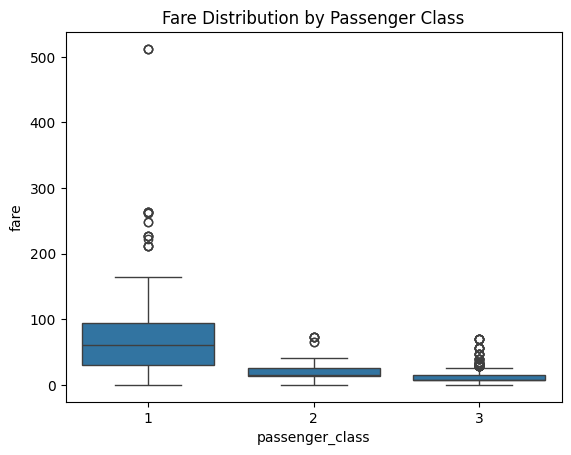

In [239]:
# examine fare distribution by class
sns.boxplot(data=cleaned_df, x='passenger_class', y='fare')
plt.title('Fare Distribution by Passenger Class')
plt.show()

In [240]:
cleaned_df.groupby('passenger_class')['fare'].describe()

,count,mean,std,min,25%,50%,75%,max
passenger_class,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


##### Conclusion by looking at 25%/50%/75% quartiles
- Most passenger_class 3 < 16
- Most passenger_class 2 13-28
- Most passenger_class 1 > 31

In [285]:
fare_bins =[0, 16, 30, cleaned_df['fare'].max()]
fare_labels = ['low', 'medium', 'high']

cleaned_df["fare_group"] = pd.cut(
    cleaned_df["fare"],
    bins=fare_bins,
    labels=fare_labels,
    include_lowest=True
)

In [286]:
# Check the survival rate by fare group
cleaned_df.groupby('fare_group')['survived'].mean()

fare_group
low       0.263918
medium    0.453488
high      0.581197
Name: survived, dtype: float64

`family_size`

In [287]:
cleaned_df['family_size'] = cleaned_df['sibling_spouse_count'] + cleaned_df['parent_child_count'] + 1

In [288]:
# Check family_size stats
cleaned_df['family_size'].describe()

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: family_size, dtype: float64

In [289]:
survival_summary_by_feature(cleaned_df, "family_size")

,family_size,count,mean,survival_rate
0,1,537,0.303538,30%
1,2,161,0.552795,55%
2,3,102,0.578431,57%
3,4,29,0.724138,72%
4,5,15,0.200000,20%
5,6,22,0.136364,13%
6,7,12,0.333333,33%
7,8,6,0.000000,0%
8,11,7,0.000000,0%


### Bin `family_group` 

In [290]:
family_size_bins =[0, 1, 4, 20]
family_size_labels = ['alone', 'small', 'large']

cleaned_df["family_group"] = pd.cut(
    cleaned_df["family_size"],
    bins=family_size_bins,
    labels=family_size_labels
)

In [291]:
# Check the survival rate by family group
cleaned_df.groupby('family_group')['survived'].mean()

family_group
alone    0.303538
small    0.578767
large    0.161290
Name: survived, dtype: float64

In [292]:
survival_summary_by_feature(cleaned_df, "family_group")

,family_group,count,mean,survival_rate
0,alone,537,0.303538,30%
1,small,292,0.578767,57%
2,large,62,0.161290,16%


### Extract `title`

In [293]:
cleaned_df.columns


Index(['passenger_id', 'survived', 'passenger_class', 'name', 'age',
       'sibling_spouse_count', 'parent_child_count', 'ticket_number', 'fare',
       'cabin', 'is_female', 'embarked_port_C', 'embarked_port_Q',
       'embarked_port_S', 'age_group', 'fare_group', 'family_size',
       'family_group'],
      dtype='str')

In [294]:
cleaned_df['name'] = cleaned_df['name'].astype(str)


type(cleaned_df['name'])
cleaned_df.isnull().sum()

passenger_id              0
survived                  0
passenger_class           0
name                      0
age                       0
sibling_spouse_count      0
parent_child_count        0
ticket_number             0
fare                      0
cabin                   687
is_female                 0
embarked_port_C           0
embarked_port_Q           0
embarked_port_S           0
age_group                 0
fare_group                0
family_size               0
family_group              0
dtype: int64

In [297]:
# Extract title from name
cleaned_df['title'] = cleaned_df['name'].str.extract(r',\s*([^\.]+)\.')

In [299]:
cleaned_df['title'].value_counts()

title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Don               1
Mme               1
Ms                1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [ ]:
# Standardise titles
cleaned_df['title'] = cleaned_df['title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs', 'Sir': 'Mr'})

# Group rare titles
rare_titles = ['Lady', 'the Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona']
cleaned_df['title'] = cleaned_df['title'].replace(rare_titles, 'Rare')

# Check values
cleaned_df['title'].value_counts()

title
Mr        518
Miss      185
Mrs       126
Master     40
Rare       22
Name: count, dtype: int64